In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf

In [2]:
ticker='GOOGL'
start_date='2018-01-01'
end_date='2024-01-01'

In [3]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.651001,53.799000,52.651001,53.660500,53.660500,31766000
2018-01-03,53.696499,54.805000,53.671501,54.576000,54.576000,31318000
2018-01-04,54.854500,55.203999,54.713001,54.787998,54.787998,26052000
2018-01-05,55.172501,55.679001,55.090000,55.514500,55.514500,30250000
2018-01-08,55.549999,55.958000,55.500000,55.710499,55.710499,24644000


In [5]:
data.shape

(1509, 6)

In [6]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data=data[['Close']]

In [8]:
data.head()

,Close
Date,
2018-01-02,53.660500
2018-01-03,54.576000
2018-01-04,54.787998
2018-01-05,55.514500
2018-01-08,55.710499


In [9]:
data['Target'] = data['Close'].shift(-1)

<ipython-input-9-444bfdd65cb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = data['Close'].shift(-1)


In [11]:
data.tail()

,Close,Target
Date,,
2023-12-22,141.490005,141.520004
2023-12-26,141.520004,140.369995
2023-12-27,140.369995,140.229996
2023-12-28,140.229996,139.690002
2023-12-29,139.690002,NaN


In [12]:
data.shape

(1509, 2)

In [13]:
data.dropna(inplace=True)

<ipython-input-13-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [14]:
data.shape

(1508, 2)

In [15]:
data.tail()

,Close,Target
Date,,
2023-12-21,140.419998,141.490005
2023-12-22,141.490005,141.520004
2023-12-26,141.520004,140.369995
2023-12-27,140.369995,140.229996
2023-12-28,140.229996,139.690002


In [16]:
X = data[['Close']]
y = data['Target']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,shuffle=False)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [22]:
mae=metrics.mean_absolute_error(y_test,y_pred)

In [23]:
print('Mean absolute error',mae)

Mean absolute error 1.6676408671477814


In [26]:
model.score(x_test,y_test)

0.9828662895279868

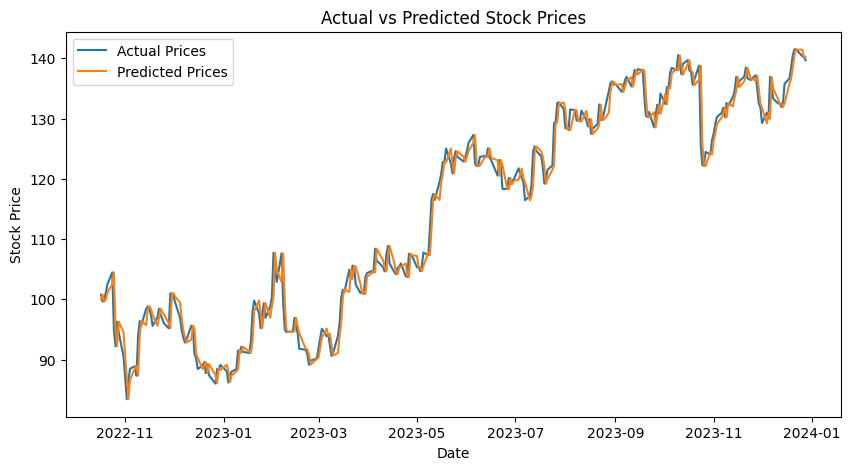

In [40]:
plt.figure(figsize=(10,5))
plt.plot(data.index[len(x_train):], y_test, label='Actual Prices')
plt.plot(data.index[len(x_train):], y_pred, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()